<a href="https://colab.research.google.com/github/preetham3216/info5731-fall2021/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
import pandas as pd
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from textblob import TextBlob
import requests
from nltk.stem import PorterStemmer
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

train_data = open(r"C:\Users\preet\Downloads\exercise09_datacollection\exercise09_datacollection\stsa-train.txt").read()
train_labels, train_text = [], []
test_labels, test_text = [], []
for i, line in enumerate(train_data.split("\n")):
    content = line.split(" ")
    train_labels.append(content[0])
    train_text.append(" ".join(content[1:]))
train_dataframe = pd.DataFrame (list(zip(train_text, train_labels)) , columns = ['text', 'label'])
train_dataframe.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
test_data = open(r"C:\Users\preet\Downloads\exercise09_datacollection\exercise09_datacollection\stsa-test.txt").read()
test_labels, test_text = [], []
for i, line in enumerate(test_data.split("\n")):
    content = line.split(" ")
    test_labels.append(content[0])
    test_text.append(" ".join(content[1:]))
test_dataframe = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['text', 'label'])
test_dataframe.head()

,text,label
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
def cleans(df):
  df["punctuationremoval"] = df["text"].str.replace('[^\w\s]','')
  df['special_chars'] = df["punctuationremoval"].str.replace('[^A-Za-z0-9 ]+','')
  df['nums_removed'] = df["special_chars"].str.replace('[^A-Za-z ]+','')
  data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
  a = data.text
  stop = a.split()
  df['stopwords'] = df["nums_removed"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df["lower_case"] = df['stopwords'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  df["tokenization"] = df["lower_case"].apply(lambda x: TextBlob(x).words)
  st = PorterStemmer()
  df["stemming"]= df["tokenization"].apply(lambda x: " ".join([st.stem(word) for word in x]))
  df["lemmatization"] = df["stemming"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return df
traindf = cleans(train_dataframe)
testdf = cleans(test_dataframe)

<ipython-input-77-ed8b68753d81>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["punctuationremoval"] = df["text"].str.replace('[^\w\s]','')
<ipython-input-77-ed8b68753d81>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['special_chars'] = df["punctuationremoval"].str.replace('[^A-Za-z0-9 ]+','')
<ipython-input-77-ed8b68753d81>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['nums_removed'] = df["special_chars"].str.replace('[^A-Za-z ]+','')


In [ ]:
tf_vec = TfidfVectorizer(analyzer='word')
tf_vec.fit(traindf['lemmatization'])
x_tf =  tf_vec.transform(traindf['lemmatization'])
vec_test = TfidfVectorizer(analyzer='word', vocabulary = tf_vec.vocabulary_)
vec_test.fit(testdf['lemmatization'])
test_x = vec_test.transform(testdf['lemmatization'])
test_y = testdf['label']
from sklearn import model_selection, preprocessing
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, traindf['label'], test_size=0.2)

In [ ]:
def model_fitting(x1, y1, x2, y2,model_name):
  if model_name=='NB':
      model=naive_bayes.MultinomialNB()
  elif model_name=='svc':
      model=svm.SVC()
  elif model_name=='knn':
      model=KNeighborsClassifier(n_neighbors = 15)
  elif model_name=='dt':
      model=DecisionTreeClassifier()
  elif model_name=='rf':
      model=RandomForestClassifier()
  elif model_name=='xgb':
      model=XGBClassifier()  
  model.fit(x1, y1)
  predicts = model.predict(x2)
  accuracy, precision, recall, f1 = get_metrics(predicts, y2)
  score = get_cross_score(model, x2, y2)
  return accuracy, precision, recall, f1, score
def get_cross_score(modelName, x, y):
  kfold = KFold(10, random_state = 7,shuffle=True)
  return cross_val_score(modelName, x, y, cv=kfold).mean()
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1
accuracy_nb, precision_nb, recall_nb, f1_nb, nb_score = model_fitting(train_x, train_y, valid_x, valid_y,'NB')
print("Naive Bayes Model:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_nb, precision_nb, recall_nb, f1_nb, nb_score))
accuracy_nbt, precision_nbt, recall_nbt, f1_nbt, nb_scoret = model_fitting(train_x, train_y, test_x, test_y,'NB')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_nbt, precision_nbt, recall_nbt, f1_nbt, nb_scoret))

Naive Bayes Model:

Training Data:
Accuracy : 0.8036101083032491
Precision : 0.8036101083032491
Recall : 0.8036101083032491
F1 : 0.8036101083032491
Cross validation Score : 0.7242154102804713

Test Data:
Accuracy : 0.7974753018660812
Precision : 0.7974753018660812
Recall : 0.7974753018660812
F1 : 0.7974753018660812
Cross validation Score : 0.7365219479973579


In [ ]:
accuracy_svm, precision_svm, recall_svm, f1_svm, svm_score = model_fitting(train_x, train_y, valid_x, valid_y,'svc')
print("SVM Model:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_svm, precision_svm, recall_svm, f1_svm, svm_score))
accuracy_svmt, precision_svmt, recall_svmt, f1_svmt, svm_scoret = model_fitting(train_x, train_y, test_x, test_y,'svc')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_svmt, precision_svmt, recall_svmt, f1_svmt, svm_scoret))

SVM Model:

Training Data:
Accuracy : 0.7942238267148014
Precision : 0.7942238267148014
Recall : 0.7942238267148014
F1 : 0.7942238267148014
Cross validation Score : 0.7198623709727869

Test Data:
Accuracy : 0.7925356750823271
Precision : 0.7925356750823271
Recall : 0.7925356750823271
F1 : 0.7925356750823271
Cross validation Score : 0.7425689065033328


In [ ]:
accuracy_knn, precision_knn, recall_knn, f1_knn, knn_score = model_fitting(train_x, train_y, valid_x, valid_y,'knn')
print("KNN Model:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_knn, precision_knn, recall_knn, f1_knn, knn_score))
accuracy_knnt, precision_knnt, recall_knnt, f1_knnt, knn_scoret = model_fitting(train_x, train_y, test_x, test_y,'knn')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_knnt, precision_knnt, recall_knnt, f1_knnt, knn_scoret))

KNN Model:

Training Data:
Accuracy : 0.6989169675090253
Precision : 0.6989169675090253
Recall : 0.6989169675090253
F1 : 0.6989169675090253
Cross validation Score : 0.6917161922635804

Test Data:
Accuracy : 0.7184412733260154
Precision : 0.7184412733260154
Recall : 0.7184412733260154
F1 : 0.7184412733260154
Cross validation Score : 0.6465381612922597


In [ ]:
accuracy_dt, precision_dt, recall_dt, f1_dt, dt_score = model_fitting(train_x, train_y, valid_x, valid_y,'dt')
print("Decision Tree:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_dt, precision_dt, recall_dt, f1_dt, dt_score))
accuracy_dtt, precision_dtt, recall_dtt, f1_dtt, dt_scoret = model_fitting(train_x, train_y, test_x, test_y,'dt')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_dtt, precision_dtt, recall_dtt, f1_dtt, dt_scoret))

Decision Tree:

Training Data:
Accuracy : 0.6787003610108303
Precision : 0.6787003610108303
Recall : 0.6787003610108303
F1 : 0.6787003610108303
Cross validation Score : 0.6426128662287561

Test Data:
Accuracy : 0.6739846322722283
Precision : 0.6739846322722283
Recall : 0.6739846322722283
F1 : 0.6739846322722283
Cross validation Score : 0.6448898096439081


In [ ]:
accuracy_rf, precision_rf, recall_rf, f1_rf, rf_score = model_fitting(train_x, train_y, valid_x, valid_y,'rf')
print("Random Forest:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_rf, precision_rf, recall_rf, f1_rf, rf_score))
accuracy_rft, precision_rft, recall_rft, f1_rft, rft_score = model_fitting(train_x, train_y, test_x, test_y,'rf')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_rft, precision_rft, recall_rft, f1_rft, rft_score))

Random Forest:

Training Data:
Accuracy : 0.7487364620938628
Precision : 0.7487364620938628
Recall : 0.7487364620938628
F1 : 0.7487364620938628
Cross validation Score : 0.7126159941611927

Test Data:
Accuracy : 0.7486278814489572
Precision : 0.7486278814489572
Recall : 0.7486278814489572
F1 : 0.7486278814489573
Cross validation Score : 0.6833183210232392


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
accuracy_xg, precision_xg, recall_xg, f1_xg, xg_score = model_fitting(train_x, train_y, valid_x, valid_y,'xgb')
print("XG Boost:\n")
print("Training Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_xg, precision_xg, recall_xg, f1_xg, xg_score))
accuracy_xgt, precision_xgt, recall_xgt, f1_xgt, xgt_score = model_fitting(train_x, train_y, test_x, test_y,'xgb')
print("\nTest Data:\nAccuracy : {0}\nPrecision : {1}\nRecall : {2}\nF1 : {3}\nCross validation Score : {4}".format(accuracy_xgt, precision_xgt, recall_xgt, f1_xgt, xgt_score))

[22:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\preet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\preet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in

XG Boost:

Training Data:
Accuracy : 0.7003610108303249
Precision : 0.7003610108303249
Recall : 0.7003610108303249
F1 : 0.7003610108303249
Cross validation Score : nan
[22:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was change

C:\Users\preet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\preet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
    self._Booster = train(
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\training.py", line 188, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\training.py", line 81, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\preet\anaconda3\lib\site-packages\xgboost\core.py", line 1680, in

[22:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
#i have taken this code from the reference which you have uploaded 


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
#Write your code here.

data = pd.read_csv(r'C:\Users\preet\Downloads\archive (1)\Amazon_Unlocked_Mobile.csv')
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
data=data[:1000]

In [ ]:
def cleans(df):
  df["punctuationremoval"] = df["Reviews"].str.replace('[^\w\s]','')
  df['special_chars'] = df["punctuationremoval"].str.replace('[^A-Za-z0-9 ]+','')
  df['nums_removed'] = df["special_chars"].str.replace('[^A-Za-z ]+','')
  data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
  a = data.text
  stop = a.split()
  df['stopwords'] = df["nums_removed"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df["lower_case"] = df['stopwords'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  df["tokenization"] = df["lower_case"].apply(lambda x: TextBlob(x).words)
  st = PorterStemmer()
  df["stemming"]= df["tokenization"].apply(lambda x: " ".join([st.stem(word) for word in x]))
  df["lemmatization"] = df["stemming"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return df

data['Reviews'] = data['Reviews'].apply(cleans)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(data['Reviews'])

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
model_tf = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,random_state=99)
model_tf.fit(tfidf)
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [ ]:
import gensim
list_of_sent_train=data['Reviews']
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(1000, 100)

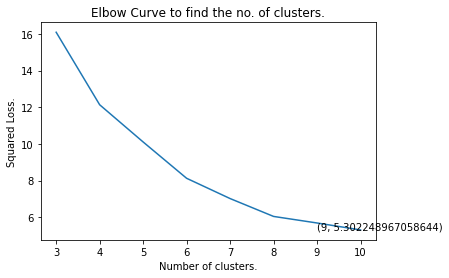

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  5.302248967058644


In [ ]:
num_clus = [x for x in range(3,11)]
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

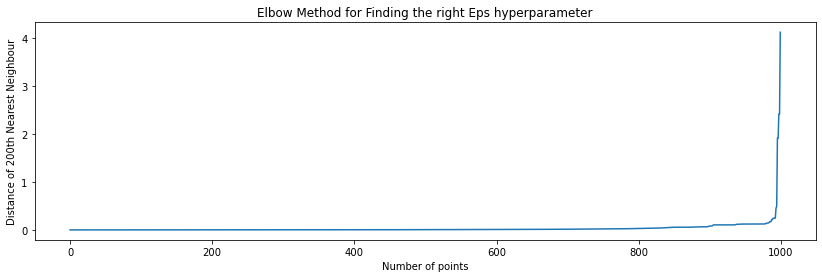

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

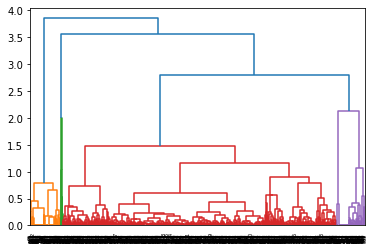

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
Hierarchical versus K-Means:
Bunching, obviously, is an emotional measurable examination, and there is more than one adequate procedure for each dataset and issue type.
Anyway, how would it be a good idea for you to respond if you can't choose K-implies and various leveled? 
1. If the dataset has a specific number of bunches however the gathering to which they have a place is obscure, utilize K-implies. 
2. Various leveled bunching ought to be utilized to decide the quantity of gatherings if the differentiations depend on earlier convictions.

How is DBSCAN different from hierarchical clustering?
As shown in the realistic beneath, progressive bunching gives a visual portrayal of how gatherings identify with each other. 
The DBSCAN ("Density-Based Clustering of Applications with Noise") strategy bunches focuses that are firmly pressed together and recognizes the rest as commotion.

